The District League Table (DLT) is a tool used in Ghana to track and rank the development progress of its districts. It has been produced annually since 2014 by UNICEF Ghana, in collaboration with the Ghana Centre for Democratic Development (CDD-Ghana), and focuses on various social sectors. The DLT aims to highlight disparities in service delivery across districts and provides a basis for allocating resources more equitably. It covers indicators such as education, health, sanitation, and water supply, and the results are used to engage both governmental and non-governmental actors to target areas where progress is slow.

In [15]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [16]:
DLT_PATH = "Data/OwnData/DLT_Data"

# 2014

In [17]:
df_2014 = pd.read_excel(
    f"{DLT_PATH}/dlt-2014-datasheet.xlsx",
    sheet_name="The DLT 2014",
    skiprows=4,
)
df_2014["Regional Score 2014"] = pd.to_numeric(
    df_2014["DLT Score"], errors="coerce"
)
df_2014 = df_2014.replace("B.  Ahafo", "B. Ahafo")
df_2014 = df_2014.dropna()
df_2014["Region"] = df_2014["Region"].str.strip()
df_2014 = (
    df_2014.groupby("Region").agg({"Regional Score 2014": "mean"}).reset_index()
)
df_2014.head(100)

,Region,Regional Score 2014
0,Ashanti,61.644663
1,B. Ahafo,62.562699
2,Central,54.908860
3,Eastern,57.862583
4,G. Accra,59.660174
5,Northern,50.570891
6,Upper East,62.414061
7,Upper West,56.159750
8,Volta,54.272074
9,Western,60.157618


# 2015 2016

In [18]:
# Create the data as a dictionary
data_2015_2016 = {
    "Region": [
        "Ashanti",
        "G. Accra",
        "B. Ahafo",
        "Upper East",
        "Western",
        "Upper West",
        "Central",
        "Eastern",
        "Northern",
        "Volta",
    ],
    "Regional Score 2015": [61, 61, 60, 59, 59, 53, 53, 55, 50, 53],
    "Regional Score 2016": [63, 62, 61, 61, 61, 60, 59, 56, 55, 54],
}

# Convert the dictionary to a pandas DataFrame
df_2015_2016 = pd.DataFrame(data_2015_2016)
df_2015_2016["Region"] = df_2015_2016["Region"].str.strip()
df_2015_2016.head()

,Region,Regional Score 2015,Regional Score 2016
0,Ashanti,61,63
1,G. Accra,61,62
2,B. Ahafo,60,61
3,Upper East,59,61
4,Western,59,61


# 2017

In [19]:
df_2017 = pd.read_excel(
    f"{DLT_PATH}/dlt-2017-datasheet.xlsx",
    sheet_name="Regional Averages 2017",
    skiprows=4,
    usecols="B:D"
)
df_2017 = df_2017.rename(columns={"Region ": "Region"})
df_2017["Region"] = df_2017["Region"].str.strip()

In [20]:
df_2017["Regional Score 2017"] = pd.to_numeric(
    df_2017["DLT score 2017"], errors="coerce"
)
df_2017 = df_2017.replace("B.  Ahafo", "B. Ahafo")
df_2017 = df_2017.dropna()
df_2017 = (
    df_2017.groupby("Region").agg({"Regional Score 2017": "mean"}).reset_index()
)
df_2017.head()

,Region,Regional Score 2017
0,Ashanti,64.319240
1,B. Ahafo,67.073327
2,Central,65.130506
3,Eastern,61.318157
4,G. Accra,67.379853


# 2018-2019

In [21]:
df_2018_2019 = pd.read_csv(f"{DLT_PATH}/DLT_scores_2018_2019.csv")
df_2018_2019["Region"] = df_2018_2019["Region"].str.strip()
df_2018_2019["Regional Score 2018-2019"] = pd.to_numeric(df_2018_2019["Score"], errors="coerce")
df_2018_2019 = df_2018_2019.dropna()
df_2018_2019 = df_2018_2019.groupby("Region").agg({"Regional Score 2018-2019": "mean"}).reset_index()
df_2018_2019.head()

,Region,Regional Score 2018-2019
0,Accra,77.387500
1,Ahafo,62.684615
2,Ashanti,60.796296
3,Central,72.252941
4,Eastern,55.425000


# 2020

In [22]:
df_2020 = pd.read_csv(f"{DLT_PATH}/DLT_scores_2020.csv")
df_2020["Region"] = df_2020["Region"].str.strip()
df_2020["Regional Score 2020"] = pd.to_numeric(df_2020["Score"], errors="coerce")
df_2020 = df_2020.dropna()
df_2020 = df_2020.groupby("Region").agg({"Regional Score 2020": "mean"}).reset_index()
df_2020.head()

,Region,Regional Score 2020
0,Ahafo,48.516667
1,Ashanti,53.618605
2,Bono,49.775000
3,Bono East,46.845455
4,Central,55.040909


# 2021

In [23]:
df_2021 = pd.read_csv(f"{DLT_PATH}/DLT_scores_2021.csv")
df_2021["Region"] = df_2021["Region"].str.strip()
df_2021["Regional Score 2021"] = pd.to_numeric(df_2021["Score"], errors="coerce")
df_2021 = df_2021.dropna()
df_2021 = df_2021.groupby("Region").agg({"Regional Score 2021": "mean"}).reset_index()
df_2021.head()

,Region,Regional Score 2021
0,Ahafo,66.617667
1,Ashanti,64.828977
2,Bono,66.559833
3,Bono East,59.435455
4,Central,67.207227


In [24]:
# List of DataFrames to merge
dfs = [df_2014, df_2015_2016, df_2017, df_2018_2019, df_2020, df_2021]

# Merge all DataFrames on the same columns
df_dlt_scores = reduce(lambda left, right: pd.merge(left, right, on="Region", how="outer"), dfs)

# Display the merged DataFrame
# df_dlt_scores[df_dlt_scores['Region'].isin(["Northern", ""])]
df_dlt_scores

,Region,Regional Score 2014,Regional Score 2015,Regional Score 2016,Regional Score 2017,Regional Score 2018-2019,Regional Score 2020,Regional Score 2021
0,Accra,NaN,NaN,NaN,NaN,77.387500,NaN,NaN
1,Ahafo,NaN,NaN,NaN,NaN,62.684615,48.516667,66.617667
2,Ashanti,61.644663,61.0,63.0,64.319240,60.796296,53.618605,64.828977
3,B. Ahafo,62.562699,60.0,61.0,67.073327,NaN,NaN,NaN
4,Bono,NaN,NaN,NaN,NaN,NaN,49.775000,66.559833
5,Bono East,NaN,NaN,NaN,NaN,NaN,46.845455,59.435455
6,Central,54.908860,53.0,59.0,65.130506,72.252941,55.040909,67.207227
7,Eastern,57.862583,55.0,56.0,61.318157,55.425000,49.172727,66.074970
8,G. Accra,59.660174,61.0,62.0,67.379853,NaN,NaN,NaN
9,Greater Accra,NaN,NaN,NaN,NaN,NaN,62.020690,72.374690


In [25]:
df_dlt_scores[df_dlt_scores["Region"].isin(["Northern", "Upper East", "Upper West"])].drop(columns="Region").mean()

Regional Score 2014         56.381567
Regional Score 2015         54.000000
Regional Score 2016         58.666667
Regional Score 2017         66.486336
Regional Score 2018-2019    68.706974
Regional Score 2020         47.197967
Regional Score 2021         60.213141
dtype: float64

In [26]:
# Assuming df_dlt_scores is already defined
mean_scores = df_dlt_scores[df_dlt_scores["Region"].isin(["Northern", "Upper East", "Upper West"])].drop(columns="Region").mean()

# Convert the mean scores to a DataFrame
mean_scores_df = mean_scores.reset_index()
mean_scores_df
mean_scores_df.columns = ["Year", "Mean DLT Score"] 
mean_scores_df["Year"] = mean_scores_df["Year"].apply(lambda x : str(x).split(" ")[-1])

# # Display the resulting DataFrame
mean_scores_df

,Year,Mean DLT Score
0,2014,56.381567
1,2015,54.000000
2,2016,58.666667
3,2017,66.486336
4,2018-2019,68.706974
5,2020,47.197967
6,2021,60.213141


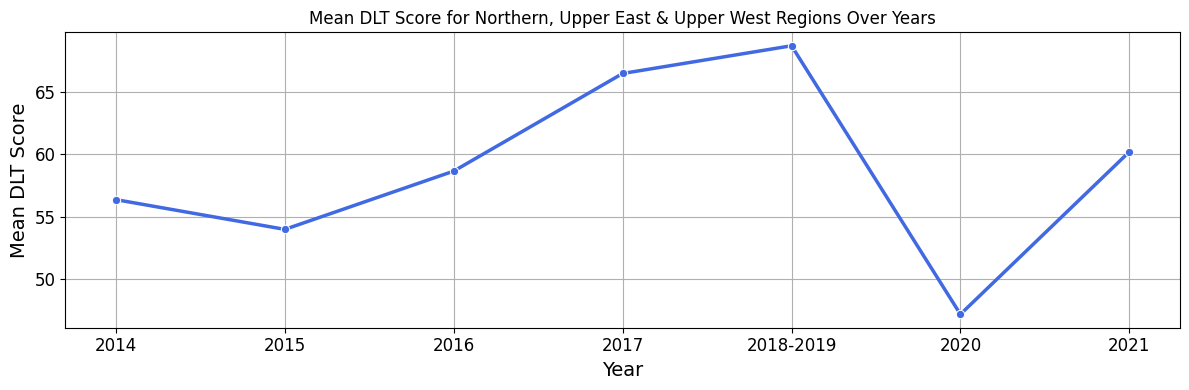

In [27]:
# Create the plot
plt.figure(figsize=(12, 4))
sns.lineplot(data=mean_scores_df, x="Year", y="Mean DLT Score", marker="o", color="royalblue", linewidth=2.5)

# Adding title and labels
plt.title("Mean DLT Score for Northern, Upper East & Upper West Regions Over Years")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean DLT Score", fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the grid
plt.grid(visible=True)

# Display the plot
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
import plotly.express as px

# Sample DataFrame (replace this with your actual DataFrame)
# mean_scores_df = pd.DataFrame({
#     'Year': [2014, 2015, 2016, 2017, 2018],
#     'Mean DLT Score': [76.5, 74.2, 72.3, 78.1, 79.5]
# })

# Create the plot
fig = px.line(mean_scores_df, 
              x='Year', 
              y='Mean DLT Score', 
              markers=True, 
              title='Mean DLT Score for Northern, Upper East & Upper West Regions Over Years')

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Mean DLT Score',
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    font=dict(size=12),
    plot_bgcolor='white',  # Set the plot background color to white
    paper_bgcolor='white',  # Set the entire figure background color to white
    title_x=0.5,
)

# Remove grid lines
fig.update_xaxes(showgrid=False)  # Remove grid lines for x-axis
fig.update_yaxes(showgrid=False)  # Remove grid lines for y-axis

# Show the plot
fig.show()